# Iris Dataset

In [1]:
import seaborn as sns
df=sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# Gathering Basic Information

In [2]:
#shape
df.shape

(150, 5)

In [3]:
#information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
#description
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
#min
df.min()

sepal_length       4.3
sepal_width        2.0
petal_length       1.0
petal_width        0.1
species         setosa
dtype: object

In [6]:
#max
df.max()

sepal_length          7.9
sepal_width           4.4
petal_length          6.9
petal_width           2.5
species         virginica
dtype: object

In [7]:
# find out the null values, if there is null values than fill the null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
#duplicated
df.duplicated().sum()

1

In [9]:
df.drop_duplicates(inplace=True)
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [10]:
#reset index
df.reset_index

<bound method DataFrame.reset_index of      sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[149 rows x 5 columns]>

# Identification of outliers using Boxplot and IQR method

<Axes: >

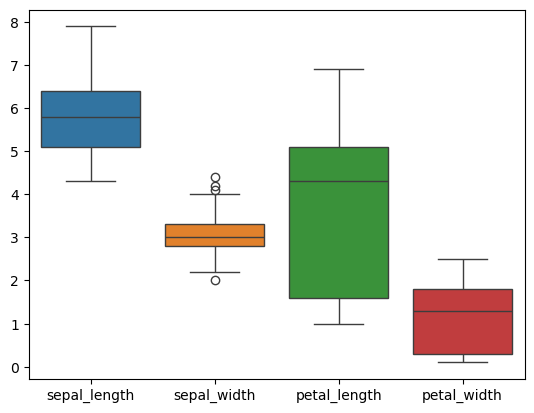

In [11]:
sns.boxplot(df)

<Axes: xlabel='sepal_width'>

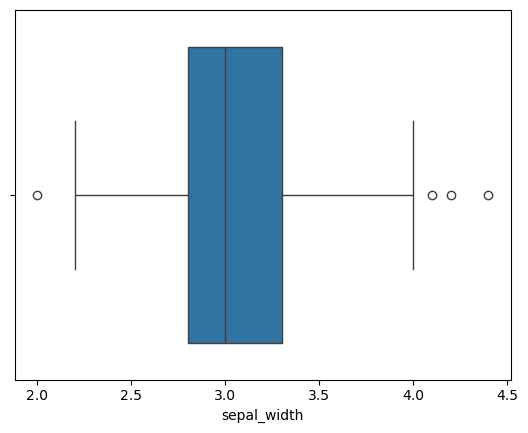

In [12]:
sns.boxplot(x='sepal_width',data=df)

In [13]:
Q1 = df['sepal_width'].quantile(0.25)
Q3 = df['sepal_width'].quantile(0.75)
IQR = Q3-Q1
threshold=1.5 
admit_outliers=df[(df['sepal_width'] <Q1-threshold*IQR) | (df['sepal_width'] > Q3+ threshold*IQR)]
admit_outliers



,sepal_length,sepal_width,petal_length,petal_width,species
15,5.7,4.4,1.5,0.4,setosa
32,5.2,4.1,1.5,0.1,setosa
33,5.5,4.2,1.4,0.2,setosa
60,5.0,2.0,3.5,1.0,versicolor


In [14]:
df=df.drop(admit_outliers.index)

<Axes: xlabel='sepal_width'>

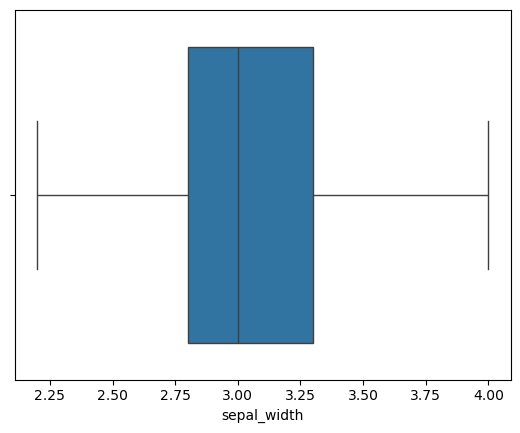

In [15]:
sns.boxplot(x='sepal_width',data=df)

In [17]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [20]:
#map function, converting in numerical values
df['species']=df['species'].map({'versicolor':0, 'virginica':1,'setosa':2})

In [21]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,2
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,2
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


# Data Visualization

<Axes: >

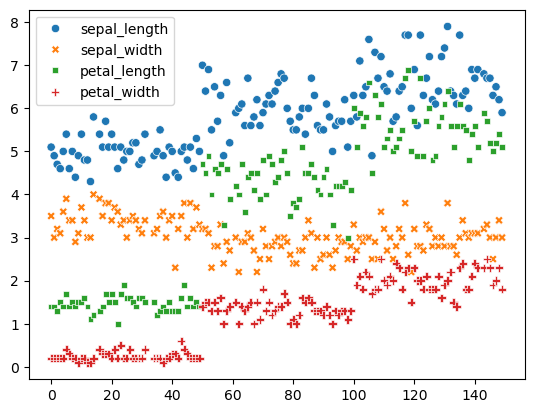

In [16]:
sns.scatterplot(df)

<Axes: xlabel='species', ylabel='sepal_length'>

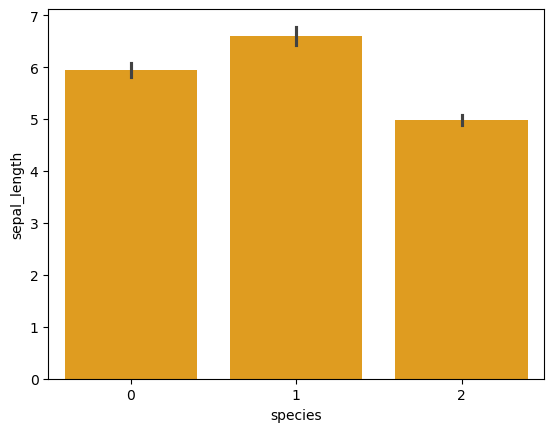

In [22]:
sns.barplot(x='species',y ='sepal_length' ,color='orange',data=df)

<Axes: xlabel='species', ylabel='sepal_width'>

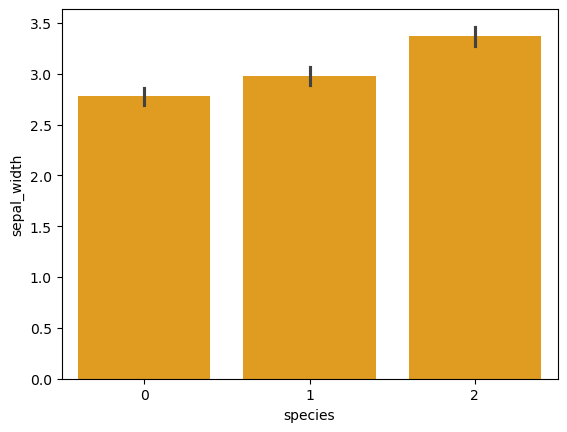

In [23]:
sns.barplot(x='species',y ='sepal_width' ,color='orange',data=df)

<Axes: xlabel='species', ylabel='petal_width'>

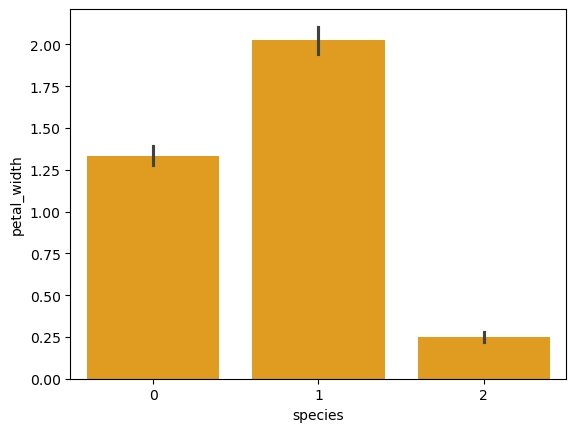

In [24]:
sns.barplot(x='species',y ='petal_width' ,color='orange',data=df)

<Axes: xlabel='species', ylabel='petal_length'>

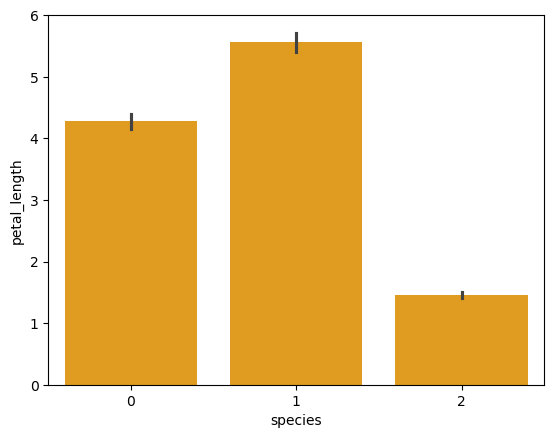

In [25]:
sns.barplot(x='species',y ='petal_length' ,color='orange',data=df)

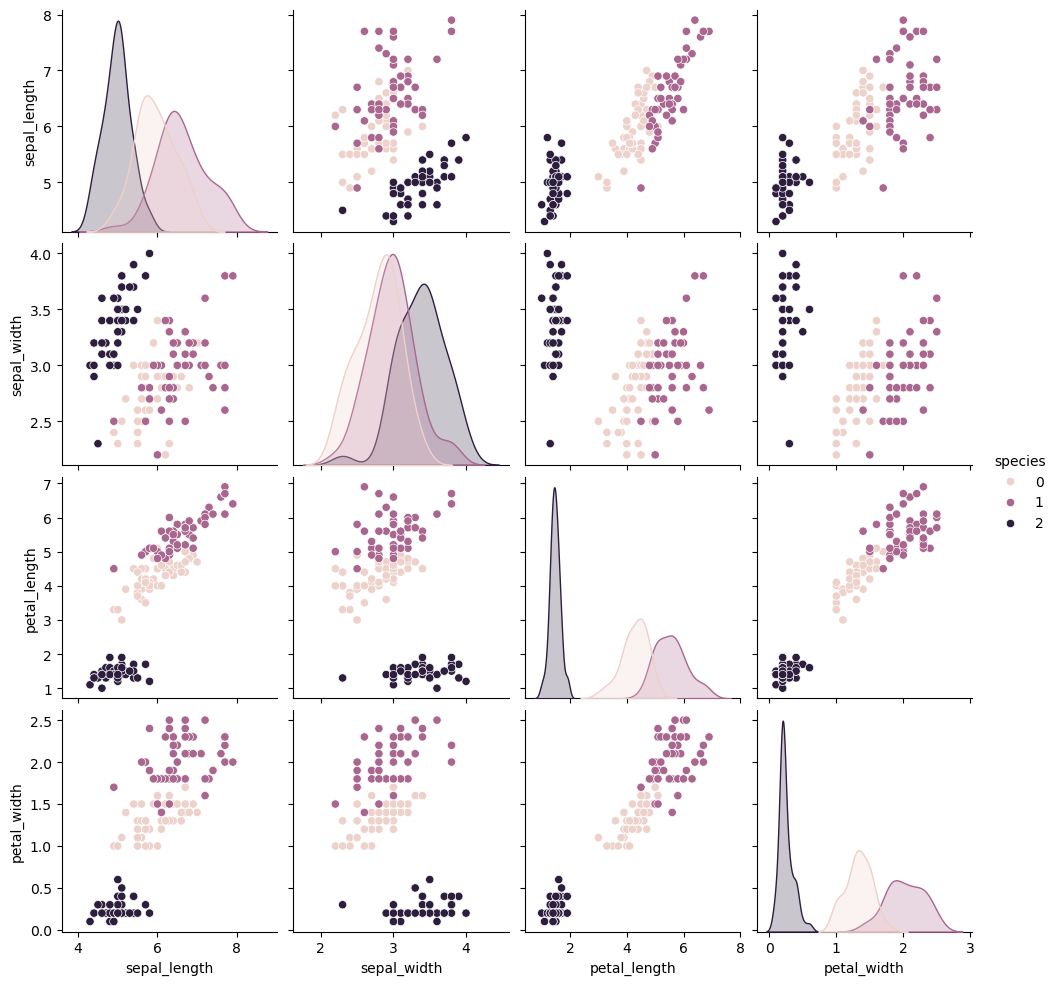

In [26]:
sns.pairplot(df, hue = 'species')

# Splitting of x and y

In [27]:
#independent and dependent features
x=df.iloc[:,0:4]
y=df.iloc[:,4]

In [28]:
x


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [29]:
y

0      2
1      2
2      2
3      2
4      2
      ..
145    1
146    1
147    1
148    1
149    1
Name: species, Length: 145, dtype: int64

In [30]:
#importing the train_test_split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [31]:
#data which need to be train
x_train

,sepal_length,sepal_width,petal_length,petal_width
9,4.9,3.1,1.5,0.1
4,5.0,3.6,1.4,0.2
27,5.2,3.5,1.5,0.2
124,6.7,3.3,5.7,2.1
129,7.2,3.0,5.8,1.6
...,...,...,...,...
75,6.6,3.0,4.4,1.4
110,6.5,3.2,5.1,2.0
14,5.8,4.0,1.2,0.2
96,5.7,2.9,4.2,1.3


In [32]:
x_test

,sepal_length,sepal_width,petal_length,petal_width
73,6.1,2.8,4.7,1.2
145,6.7,3.0,5.2,2.3
28,5.2,3.4,1.4,0.2
20,5.4,3.4,1.7,0.2
45,4.8,3.0,1.4,0.3
121,5.6,2.8,4.9,2.0
130,7.4,2.8,6.1,1.9
112,6.8,3.0,5.5,2.1
88,5.6,3.0,4.1,1.3
19,5.1,3.8,1.5,0.3


In [33]:
y_train

9      2
4      2
27     2
124    1
129    1
      ..
75     0
110    1
14     2
96     0
106    1
Name: species, Length: 116, dtype: int64

In [34]:
y_test

73     0
145    1
28     2
20     2
45     2
121    1
130    1
112    1
88     0
19     2
12     2
58     0
132    1
82     0
77     0
39     2
116    1
137    1
104    1
105    1
98     0
140    1
11     2
70     0
34     2
48     2
54     0
80     0
115    1
Name: species, dtype: int64

# Logistic Regression Model

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
classifier = LogisticRegression()

In [37]:
classifier

LogisticRegression()

In [38]:
from sklearn.model_selection import GridSearchCV
parameter ={'penalty':['l1','l2','elasticnet'],
             'C':[1,2,3,4,5,6,10,20,30,40,50],
              'max_iter':[100,200,300]}

In [39]:

classifier_regressor = GridSearchCV(classifier,
                                    param_grid = parameter,
                                    scoring='accuracy',
                                    cv = 5)


In [40]:
classifier_regressor.fit(x_train, y_train)

D:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [41]:
print(classifier_regressor.best_params_)

{'C': 50, 'max_iter': 100, 'penalty': 'l2'}


In [42]:
print(classifier_regressor.best_score_)

0.9913043478260869


In [43]:
#prediction
classifier_regressor.predict(x_test)

array([0, 1, 2, 2, 2, 1, 1, 1, 0, 2, 2, 0, 1, 0, 1, 2, 1, 1, 1, 1, 0, 1,
       2, 1, 2, 2, 0, 0, 1], dtype=int64)

In [44]:
y_pred = classifier_regressor.predict(x_test)
y_pred

array([0, 1, 2, 2, 2, 1, 1, 1, 0, 2, 2, 0, 1, 0, 1, 2, 1, 1, 1, 1, 0, 1,
       2, 1, 2, 2, 0, 0, 1], dtype=int64)

In [45]:
#accuracy score
from sklearn.metrics import accuracy_score,classification_report

In [46]:
score = accuracy_score(y_pred,y_test)
print(score)

0.9310344827586207


In [47]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88         7
           1       1.00      0.85      0.92        13
           2       1.00      1.00      1.00         9

    accuracy                           0.93        29
   macro avg       0.93      0.95      0.93        29
weighted avg       0.95      0.93      0.93        29

